<div style="border:solid green 2px; padding: 20px">
<b>Дмитрий, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Критическая ошибка: ❌</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Хорошо, но можно и лучше: ❗️</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Все отлично: ✅</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Анализ

В данном анализе необходимо выработать подходы работы с данными игровой индустрии. Для начала надо проести предобработку данных и далее провести исследовательский анализ. Табличка содержит следующие столбцы:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Рекомендуется делать краткое вступление в работу и описание того, что планируешь сделать (если план у тебя уже сформирован), а также информацию о входных данных: какие столбцы есть в таблице, их названия и какую информацию они несут. Так работа станет выглядеть презентабельнее.

</div>

## Обзор данных

Проведем анализ данных, для начала импортируем табличку и посмотрим на первые 10 строк проекта, сводную информацию о датасете, описание столбцов и первые графики.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


По первой информации видно, что в таблице есть пропуски данных, неправильные названия столбцов, неправильный тип данных столбца.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Классный способ сделать таблицу более читабельной 👍
</div>

## Преддобработка данных

### Общее

Сначала изменим названия столбцов, сделаем их прописными буквами.

In [4]:
df.columns = df.columns.str.lower()

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Первичные данные посмотрели, давай теперь их обработаем, ведь у нас есть план 😊. 
</div>

### Столбец name


Данный столбец содержит всего 2 пропуска и потому заполним эти пробелы словом 'unknown'. Разработчики могли просто не предумать название своей игре.

In [5]:
df.loc[df['name'].isna(), 'name'] = 'unknown'

### Столбец platform


Данный столбец не содержит пропусков.

### Столбец genre


Столбец содержит 2 пропуска их заменим словом 'unknown' также. Разработчики не смогли определить жанр своей игры.

In [6]:
df.loc[df['genre'].isna(), 'genre'] = 'unknown'

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Для замен значений здесь и выше, думаю отлично подошел бы цикл `for`.
</div>

### Столбцы na_sales, eu_sales, jp_sales, other_sales


Данные этих столбцов не содержат пропусков.


### Столбец year_of_release

Данный столбец во-первых типа float, изменим на int, так как год - натуральное число.

In [7]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

Добавим строки с пропуском года выпуска в отфильтрованные значения. Пропуски заменим значением 1, в дальнейшем исследовании всегда можно будет понять, что 1 является пропуском и исключить из рассмотрения.

In [8]:
df['filter'] = True
df.loc[df.year_of_release.isna(), 'filter'] = False
df.loc[df.year_of_release.isna(), 'year_of_release'] = 1

Далее обработаем пропуски. Возможно часть пропусков связана с тем что есть запись об игре вышедшей на одной платформе, а на другой платформе год уже не стали указывать. Хотя и технические ошибки тоже возможны.

<div class="alert alert-danger">
<b>Комментарий ревьюера: ❌</b>

<s>Поправь пожалуйста ошибку в коде, чтобы я смог проверить проект дальше.
    
Рекомендую перед отправкой проекта запустить весь проект целиком, чтобы не возникло дополнительных ошибок.
    
</div>

<div class="alert alert-info"> Я работал в VS Code, но не в тренажере. Возможно разные версии библиотек, потому как у меня всё отработало без ошибок. В дальнейшем буду переносить в тренажер и потом отправлять на проверку, тк кнопка "загрузить" и отправить минует тренажер.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Так и подумал, что проблема с версиями 😊, попробую тогда без запуска написать свои комментарии.    
    
</div>

Далее заполним ячейки года выпуска игры, год выхода той же игры, но на другой платформе.

In [9]:
temp = pd.pivot_table(df, values='year_of_release', 
                                        index='name', 
                                        aggfunc='first').reset_index().rename({'year_of_release': 'same_year_of_release'}, axis=1)

df = df.merge(temp, on='name', how='left')
df.loc[df.year_of_release.isna() & (~df.same_year_of_release.isna()), 'year_of_release'] = df['same_year_of_release']
df.drop(columns=['same_year_of_release'], inplace=True)

### Столбец critic_score

Пропуски заменим значением -1, в дальнейшем исследовании всегда можно будет понять, что 1 является пропуском и исключить из рассмотрения:

In [10]:
df.loc[df.critic_score.isna(), 'filter'] = False
df.loc[df.critic_score.isna(), 'critic_score'] = -1


Этот столбец содержит как пропуски так и неправильный тип данных, нужно сделать Int, так как все оценки это натуральные числа. Пропуски заполним таким же способом как и год выхода только заполнять будем медианой.

In [11]:
temp = pd.pivot_table(df, values='critic_score', 
                                        index='name', 
                                        aggfunc='median').reset_index().rename({'critic_score': 'same_critic_score'}, axis=1)

df = df.merge(temp, on='name', how='left')
df.loc[df.critic_score.isna() & (~df.same_critic_score.isna()), 'critic_score'] = df['same_critic_score']
df.drop(columns=['same_critic_score'], inplace=True)
df['critic_score'] = np.ceil(df['critic_score']).astype('Int64')

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Здорово, что используешь методы из библиотеки `numpy`, очень быстрая библиотека для расчетов 😊    
    
</div>

### Столбец user_score

Пропуски заменим значением -1 для пропусков и -2 для tbd, в дальнейшем исследовании всегда можно будет понять, что -1 и -2 является пропуском/tbd и исключить из рассмотрения:

In [12]:
df.loc[df.user_score.isna(), 'filter'] = False
df.loc[df.user_score.isna(), 'user_score'] = -1
df.loc[df['user_score'] == 'tbd', 'user_score'] = -2
df['user_score'] = df['user_score'].astype('Float64')


Столбец содержит пропуски неправильного типа данных, но перед тем как перевести в Int, надо понять что за значение ***'tbd'***. Данная запись означает, что оценка пока не определена игра не так давно вышла и оценки могут повлиять на продажи.

In [13]:
temp = df[df['user_score'] != 'tbd'][['name', 'user_score']].dropna().groupby('name', as_index=False)['user_score'].median().rename({'user_score': 'same_user_score'}, axis=1)
df = df.merge(temp, on='name', how='left')
df.loc[df.user_score.isna() & (~df.same_user_score.isna()), 'user_score'] = df['same_user_score']
df.drop(columns=['same_user_score'], inplace=True)

### Столбец rating


Столбец содержит пропуски. Стоит сразу заполнить пропуски рейтинга для игр вышедших до 1994, так как до этого года ESRB не существовало, также эта компания маркирует игры только Северной Америки, но не Европы и Японии. Потому в первом случае пропуски заменем на 'old', а во втором случае на 'eu_game' или 'jp_game', определим это по продажам в соответствующих регионах.

In [14]:
df.loc[df.rating.isna(), 'filter'] = False
df.loc[df.rating.isna(), 'rating'] = 'unrated'
df.loc[df['year_of_release'] < 1994, 'rating'] = 'old'
df.loc[(df['eu_sales'] > df['na_sales'])&(df['eu_sales'] > df['jp_sales'])&df['rating'].isna(), 'rating'] = 'eu_game'
df.loc[(df['jp_sales'] > df['na_sales'])&(df['jp_sales'] > df['eu_sales'])&df['rating'].isna(), 'rating'] = 'jp_game'

In [15]:
temp = df[['name', 'rating']].dropna().groupby('name', as_index=False)['rating'].first().rename({'rating': 'same_rating'}, axis=1)
df = df.merge(temp, on='name', how='left')
df.loc[df.rating.isna() & (~df.same_rating.isna()), 'rating'] = df['same_rating']
df.drop(columns=['same_rating'], inplace=True)

In [16]:
df['rating'].value_counts()

unrated    6315
E          3921
T          2903
M          1535
E10+       1392
old         636
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

### Добавление столбцов

Также добавим столбец общих продаж игры во всех регионах.

In [17]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Кстати мы можем применить метод `sum(axis=1)` к суммируемым столбцам.
    
`df[['col1', 'col2', 'col3']].sum(axis=1)`
</div>

### Выводы

После предобработки данных были изменены типы данных в столбцах, где это необходимо, заплнены пропуски где это было возможно. Пропущенные данные были ***помеченны*** явно отличенными от используемых в таблице значениями, для того чтобы в дальнейшем анализе было можно легко их исключить, также добавлен столбец filter для отброски всех пропущенных данных.

In [18]:
print('Доля пропусков в датасете составляет {:.2f}'.format(df[df['filter']==True].shape[0] / df.shape[0]))

Доля пропусков в датасете составляет 0.47


<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Хороший способ посчитать долю пропущенных значений 👍
</div>

## Анализ данных

### Определение актуального периода для проведения прогноза на 2017 год

Посмотрим на распределение игр по годам

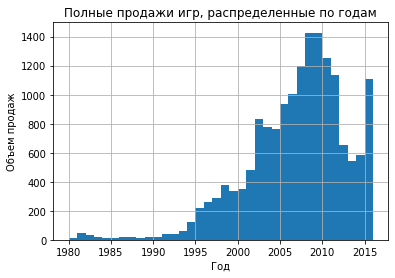

In [19]:
df['year_of_release'].hist(bins=36, range=(1980, 2016), rwidth=10)
plt.title('Полные продажи игр, распределенные по годам')
plt.ylabel('Объем продаж')
plt.xlabel('Год')
plt.show()

Пик выпуска игр - 2008/2009, после 2001 наблюдается скачок выхода игр.

Посмотрим на распределение полных продаж игр по платформам.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Хорошо, когда график и его оси подписаны 😊👍
    
Так быстрее понять о чем идёт речь на самом графике.
    
</div>

In [20]:
display(pd.pivot_table(df, index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False))

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Посмотрим на распределение количества игр на соответствующих платформах по годам, вынесем старые платформы в отдельный список, чтобы было нагляднее.

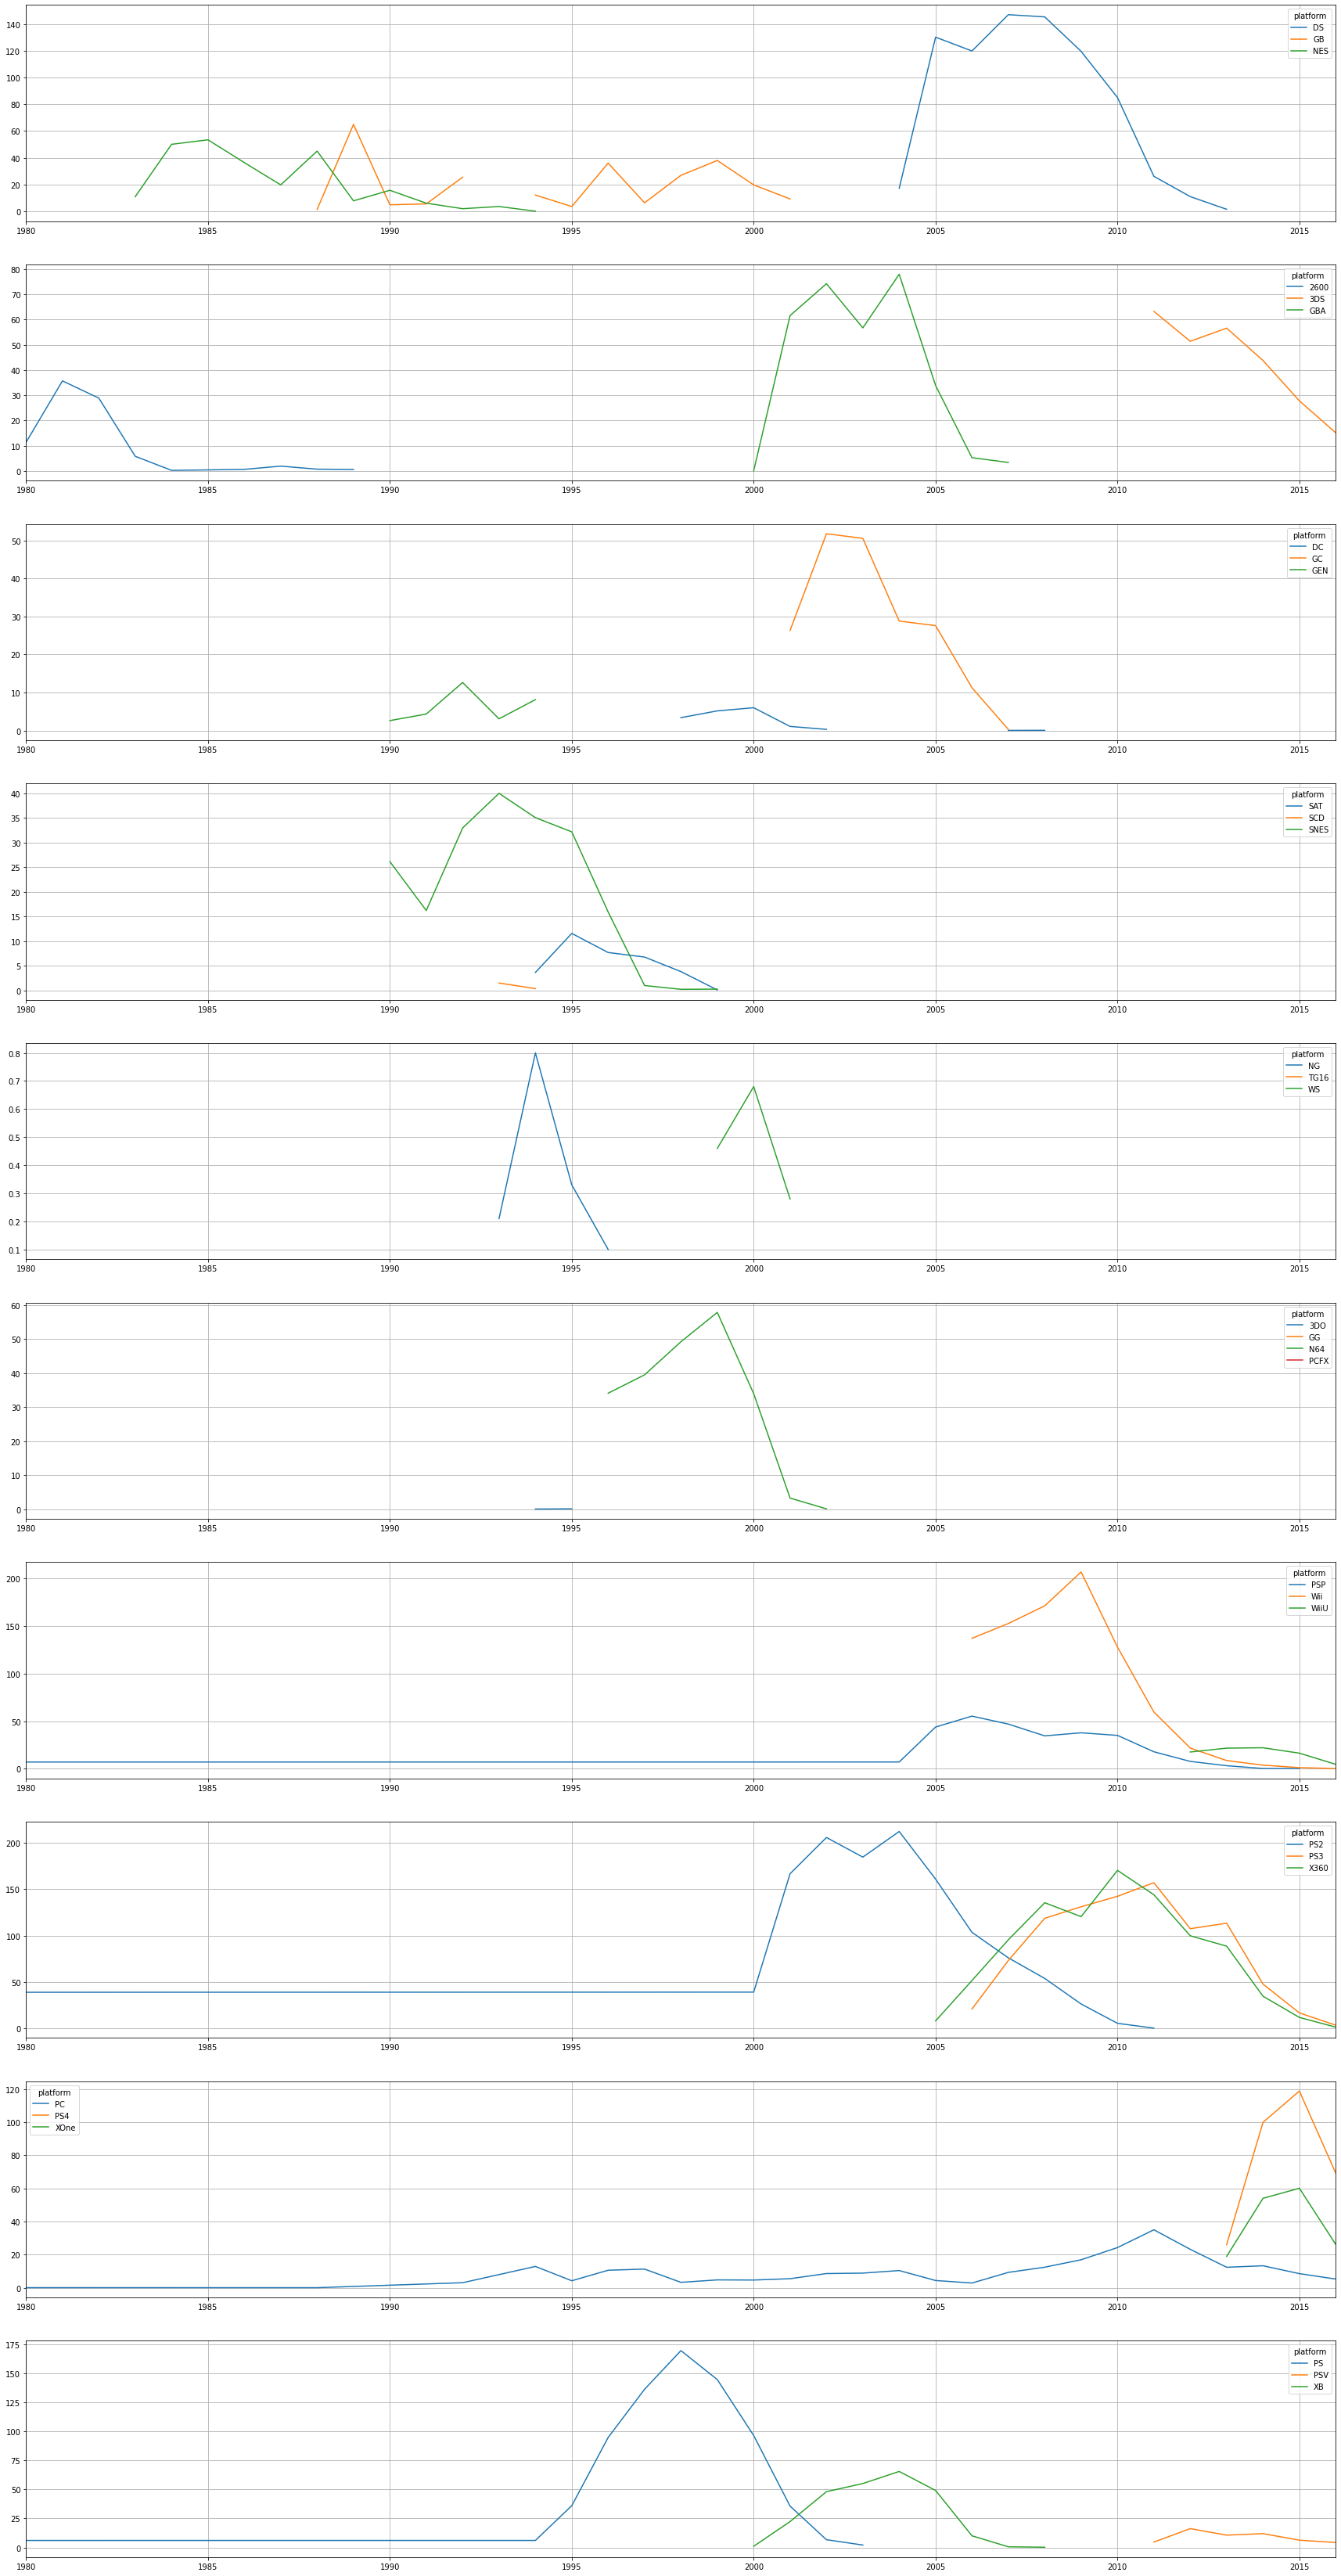

In [21]:
plt_diag = [['NES',  'GB',   'DS'], 
            ['GBA',  '3DS',  '2600'], 
            ['GC',   'GEN',  'DC'],
            ['SNES', 'SAT',  'SCD'],
            ['WS',   'NG',   'TG16'],
            ['3DO',  'GG',   'PCFX', 'N64'],
            ['Wii',  'WiiU', 'PSP'],
            ['X360', 'PS2',  'PS3'],
            ['PC',   'PS4',  'XOne'],
            ['PSV',  'XB',   'PS']
           ]
platforms = df['platform'].unique()

fig, axs = plt.subplots(nrows=len(plt_diag), ncols=1, figsize=(30, 60))
#fig.suptitle('График объема продаж игр на разных платформах по годам')
count=0
for p in plt_diag:
    temp = df[(df['platform'].isin(p))&(df['year_of_release']>0)].pivot_table(index='year_of_release',
                                                                          columns='platform',
                                                                          values='total_sales',
                                                                          aggfunc='sum')
    temp.plot(grid=True, ax=axs[count], xlim=(1980, 2016), xlabel='')
    count += 1

plt.show()

Большинство платформ из набора данных к 2016 году ***"вымерли"*** и не влияют на прогнозирование 2017 года.

Посмотрим распределение продаж по платформам в 2016 году.

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Обрати внимание, что график не совсем читабелен, потому что включает в себя много линий. Обычно используют 2-3 линии максимум на одном графике, чтобы повысить комфортность изучения графика.
    
Рекомендовал бы посмотреть каждую платформу на отдельном графике или использовать метод `subplots` построив графики в 2 столбца например.
    
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

🔥🔥🔥    
    
</div>

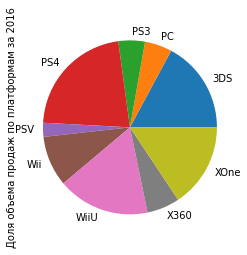

In [22]:
#ass = df[~df['platform'].isin(old_platform)&(df['year_of_release']==2016)].pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
df[df['year_of_release']==2016].dropna().groupby('platform')['total_sales'].mean().plot.pie(ylabel='Доля объема продаж по платформам за 2016')
stil_alive_platform = ['PC', 'Wii', 'WiiU', 'X360', 'XOne', 'PS3', 'PS4']


Как видно из графика наиболее популярные платформы PS4 и XOne. Оценим среднее количество лет ***жизни*** платформы.

(-1.0, 17.0)

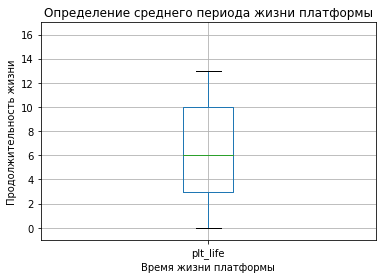

In [23]:
for p in df['platform'].unique():
    df.loc[df['platform']==p, 'plt_life'] = df[(df['platform'] == p)&(df['year_of_release']>1)]['year_of_release'].max() - df[(df['platform'] == p)&(df['year_of_release']>1)]['year_of_release'].min()
    
pd.pivot_table(df, index='platform', values='plt_life', aggfunc='median').boxplot()
plt.xlabel('Время жизни платформы')
plt.ylabel('Продолжительность жизни')
plt.title('Определение среднего периода жизни платформы')
plt.ylim(-1, 17)

В среднем платформа живет 6 лет.

По полученным данным можно констатировать что актуальным периодом для анализа будут 3-4 предыдущих года, так как в среднем платформа живет 8 лет и если прошло всего половина этого периода, значит в запасе у магазина будет ещё время на этой платформе. По графику распределения продаж по платформам видно, что PS4 и XOne, увеличивают свои продажи, а остальные потихоньку сходят на нет, кроме персональных компьютеров, продажи которых всегда держаться на одном уровне. WiiU имеет достаточно крупную долю продаж в 2016 году и так как она появилась в 2012 стоит выбрать актуальным периодом 2012-2016 года.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Согласен.
    
Логичный подход к расчету 👍
    
</div>

In [24]:
df_actual = df[df['year_of_release'] >= 2012]

### Глобальным продажи игр в разбивке по платформам

(-0.05, 2.5)

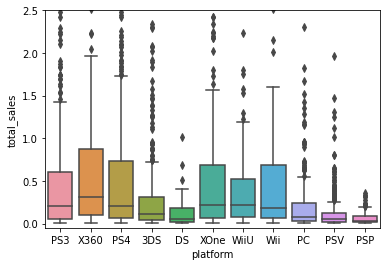

In [25]:
sns.boxplot(data=df_actual, x='platform', y='total_sales', order=list(df_actual['platform'].unique()))
plt.ylim(bottom=-0.05, top=2.5)

Наиболее прибыльные PS3, X360, PS4, XOne, Wii, WiiU

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Кстати для того чтобы подписать график мы можем использовать метод `plt.title()` и в конце кода применить `plt.show()`
</div>

### Оценка корреляции оценок на глобальные продажи игр

Построим график корреляции оценок на объем продаж наиболее популярной платформы - PS3.

Text(0, 0.5, 'Объем продаж')

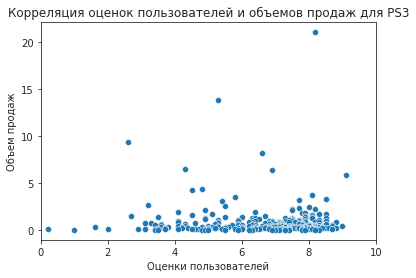

In [26]:
sns.set_style('ticks')
sns.scatterplot(data=df_actual[df_actual['platform'] == 'PS3'], x='user_score', y='total_sales')
plt.xlim(left=0, right=10)
plt.title('Корреляция оценок пользователей и объемов продаж для PS3')
plt.xlabel('Оценки пользователей')
plt.ylabel('Объем продаж')

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Также мы можем увеличить сам график, чтобы его было удобнее изучать с помощью метода `plt.figure(figsize=(10,7))` или если используешь методы библиотеки `pandas`, в основном всегда есть атрибут `figsize=(10,7)`, который также поможет настроить ширину и высоту графика.
    
</div>

Text(0, 0.5, 'Объем продаж')

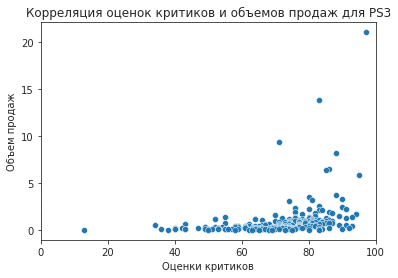

In [27]:
sns.scatterplot(data=df_actual[df_actual['platform'] == 'PS3'], x='critic_score', y='total_sales')
plt.xlim(left=0, right=100)
plt.title('Корреляция оценок критиков и объемов продаж для PS3')
plt.xlabel('Оценки критиков')
plt.ylabel('Объем продаж')

Посчитаем корреляцию для всех платформ по отдельности

In [28]:
for p in df_actual['platform'].unique():
    print('Корреляция оценок и объемов продаж для', p)
    display(df_actual[df_actual['platform']==p][['total_sales', 'critic_score', 'user_score']].corr())

Корреляция оценок и объемов продаж для PS3


,total_sales,critic_score,user_score
total_sales,1.000000,0.298204,0.218702
critic_score,0.298204,1.000000,0.760580
user_score,0.218702,0.760580,1.000000


Корреляция оценок и объемов продаж для X360


,total_sales,critic_score,user_score
total_sales,1.000000,0.260993,0.104884
critic_score,0.260993,1.000000,0.639099
user_score,0.104884,0.639099,1.000000


Корреляция оценок и объемов продаж для PS4


,total_sales,critic_score,user_score
total_sales,1.000000,0.226526,0.117211
critic_score,0.226526,1.000000,0.904835
user_score,0.117211,0.904835,1.000000


Корреляция оценок и объемов продаж для 3DS


,total_sales,critic_score,user_score
total_sales,1.000000,0.149864,0.131915
critic_score,0.149864,1.000000,0.903828
user_score,0.131915,0.903828,1.000000


Корреляция оценок и объемов продаж для DS


,total_sales,critic_score,user_score
total_sales,1.000000,0.079326,0.105847
critic_score,0.079326,1.000000,0.622876
user_score,0.105847,0.622876,1.000000


Корреляция оценок и объемов продаж для XOne


,total_sales,critic_score,user_score
total_sales,1.000000,0.273782,0.126290
critic_score,0.273782,1.000000,0.776371
user_score,0.126290,0.776371,1.000000


Корреляция оценок и объемов продаж для WiiU


,total_sales,critic_score,user_score
total_sales,1.000000,0.297168,0.259601
critic_score,0.297168,1.000000,0.853781
user_score,0.259601,0.853781,1.000000


Корреляция оценок и объемов продаж для Wii


,total_sales,critic_score,user_score
total_sales,1.000000,0.538293,0.611024
critic_score,0.538293,1.000000,0.545043
user_score,0.611024,0.545043,1.000000


Корреляция оценок и объемов продаж для PC


,total_sales,critic_score,user_score
total_sales,1.000000,0.203580,0.054643
critic_score,0.203580,1.000000,0.815215
user_score,0.054643,0.815215,1.000000


Корреляция оценок и объемов продаж для PSV


,total_sales,critic_score,user_score
total_sales,1.000000,0.395085,0.375410
critic_score,0.395085,1.000000,0.873302
user_score,0.375410,0.873302,1.000000


Корреляция оценок и объемов продаж для PSP


,total_sales,critic_score,user_score
total_sales,1.000000,0.091510,0.195498
critic_score,0.091510,1.000000,0.619232
user_score,0.195498,0.619232,1.000000


По расчитаной корреляции между оценками и объемом продаж можно констатировать, что сильной зависимости нет между ними. Кроме Wii где наблюдается корреляция между оценками пользователей и продажами.


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В том числе мы можем использовать метод `heatmap` из библиотеки `seaborn`, для того чтобы визуализировать матрицу корреляции. 
    
</div>

### Распределение объема продаж по жанрам игр


Посмотрим на распределение объема продаж по жанрам игр.

,total_sales
genre,
Shooter,1.296723
Platform,0.717647
Sports,0.675634
Role-Playing,0.521081
Racing,0.465217
Misc,0.442917
Simulation,0.439000
Action,0.427856
Fighting,0.408165


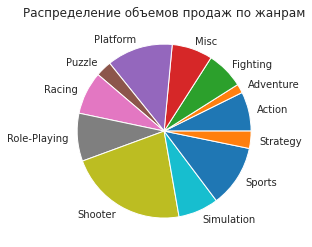

In [29]:
display(df_actual.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values(by='total_sales', ascending=False))
df_actual.groupby('genre')['total_sales'].mean().plot.pie(title='Распределение объемов продаж по жанрам', ylabel='')
plt.show()

В среднем игры жанра Shooter, Sports и Platform имеют большие объема продаж.

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>А если мы посмотрим на средние значения продаж, какие выводы мы сможем сделать ? 
    
Почему на средние значения ? 
    
Т.к. эта метрика более устойчива к выбросам, чем просто суммы и количественные показатели.
    
</div>

## Составление портрета пользователя каждого региона

### Предпочитаемая платформа

Составим графики распределения объема продаж по платформам для каждого региона

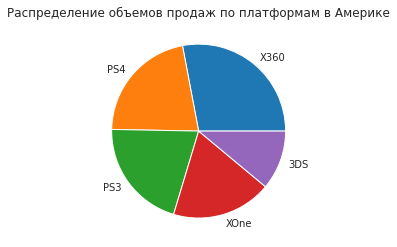

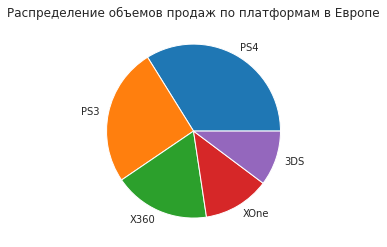

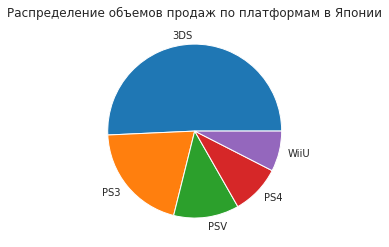

In [30]:
df_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5).plot.pie(title='Распределение объемов продаж по платформам в Америке', y='na_sales', ylabel='', legend=False)
plt.show()
df_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5).plot.pie(title='Распределение объемов продаж по платформам в Европе', y='eu_sales', ylabel='', legend=False)
plt.show()
df_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5).plot.pie(title='Распределение объемов продаж по платформам в Японии', y='jp_sales', ylabel='', legend=False)
plt.show()

Картина для Европы и Америки схожа, но Япония сильно отличается. В Японии превалирует платформа 3DS, также очень популярными являются карманные приставки и в топ-5 нет платформы от майкрософт.

### Предпочитаемый жанр

Построим графики распределения топ-5 жанровых предпочтений для каждого региона:

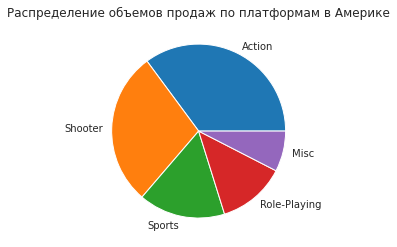

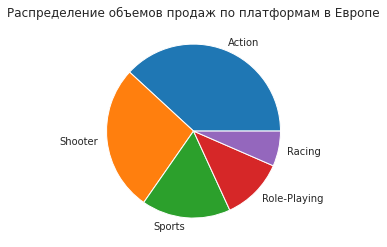

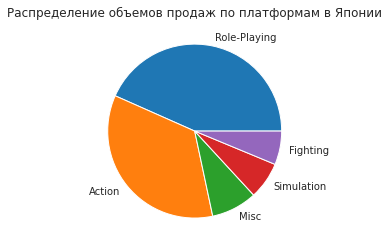

In [31]:
df_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5).plot.pie(title='Распределение объемов продаж по платформам в Америке', y='na_sales', ylabel='', legend=False)
plt.show()
df_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5).plot.pie(title='Распределение объемов продаж по платформам в Европе', y='eu_sales', ylabel='', legend=False)
plt.show()
df_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5).plot.pie(title='Распределение объемов продаж по платформам в Японии', y='jp_sales', ylabel='', legend=False)
plt.show()

Как видно из графиков если Европа и Америка отличается 4 и 5 местами рейтинга, то Япония предпочитает практически полностью другие игры, кроме жанра Action.

### Влияние рейтинга игры на продажи по каждому из регионов

Построим сводную таблицу, в которой строками будут рейтинги игр, а столбцами объемы продаж по регионам.

In [32]:
df_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.96,26.02,66.02
unrated,91.50,108.84,103.31


И опять схожая картина для Европы и Америки, но полностью отлченная у Японии. Если в первом случае игры с рейтингом "Взрослые" наиболее прибылен, то в Японии, ввиду отсутствия ESRB - нет. 

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Достаточно детально проанализировали наши данные и изучили портреты пользователей.
    

    
Давай теперь проверим наши гипотезы.
    
</div>

## Проверка гипотез

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

<s>Лучше всего импортировать все необходимые библиотеки в самом начале проекта. 
    
Это общепринятый формат в программировании, ведь так проще понять какие пакеты будут использованы в нашей работе.
    
</div>

Первой гипотезой является - ***Средние пользовательские рейтинги платформ Xbox One и PC одинаковые***

Это же утверждение и будет нулевой гипотезой.

Проведем анализ при пороге pvalue в 5%

Второй гипотезой является - ***Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные***

Нулевой гипотезой будет - равенство средних пользовательских рейтингов жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)

Если нулевая гипотеза будет отвергнута, значит утверждение ***Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные*** - верно.

Проведем анализ при пороге pvalue в 5%

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Хорошая функция для проверки гипотез 👍🔥   
    
</div>

/tmp/ipykernel_178/1491611578.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values1 = list(df_actual[(df[col] == var1)&(df_actual['user_score'] > 0)]['user_score'].values)
/tmp/ipykernel_178/1491611578.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values2 = list(df_actual[(df[col] == var2)&(df_actual['user_score'] > 0)]['user_score'].values)
/tmp/ipykernel_178/1491611578.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_actual[(df[col] == var1)&(df_actual['user_score'] > 0)]['user_score'].plot(title=var1, kind='hist', ax=axs[0])
/tmp/ipykernel_178/1491611578.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_actual[(df[col] == var2)&(df_actual['user_score'] > 0)]['user_score'].plot(title=var2, kind='hist', ax=axs[1])


pvalue =  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


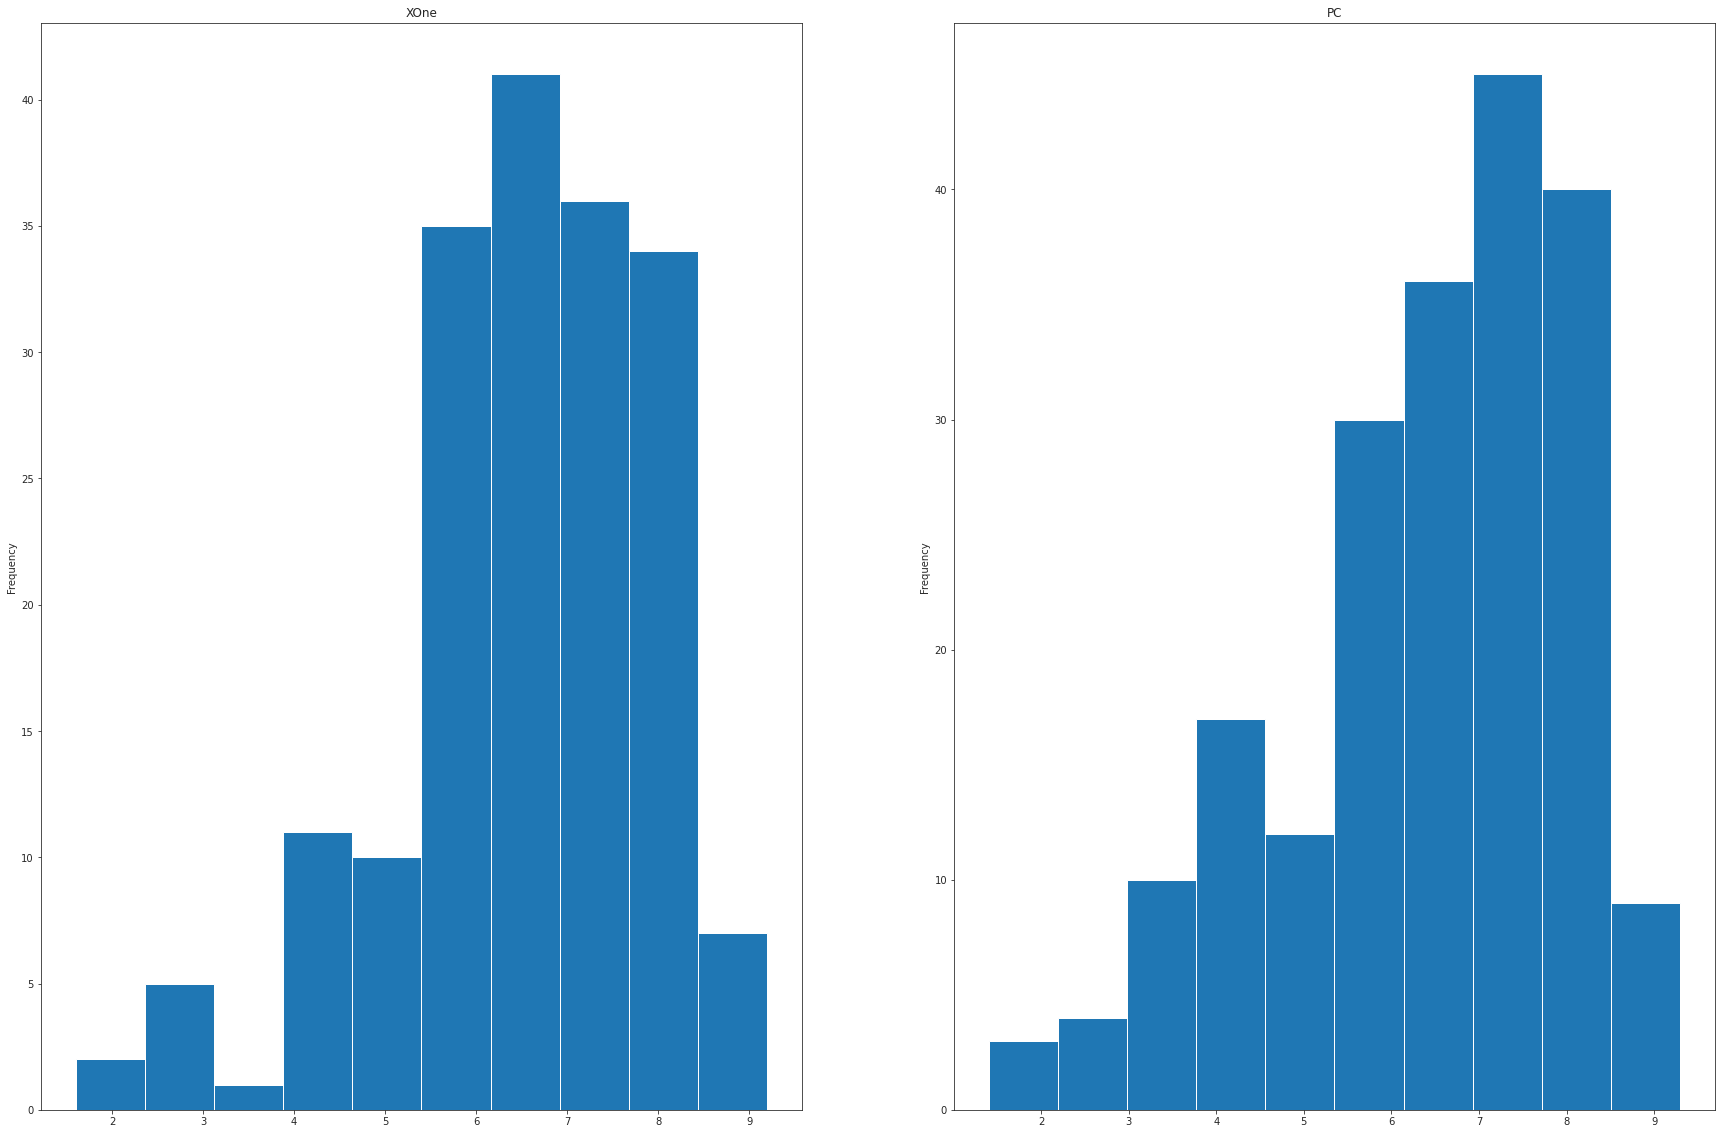

In [33]:
def stat_test(col, var1, var2):    
    values1 = list(df_actual[(df[col] == var1)&(df_actual['user_score'] > 0)]['user_score'].values)
    values2 = list(df_actual[(df[col] == var2)&(df_actual['user_score'] > 0)]['user_score'].values)

    results = st.ttest_ind(values1, values2, equal_var=False)
    alpha = .05
    print('pvalue = ', results.pvalue)
    if results.pvalue < alpha : 
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(30, 20))    
    df_actual[(df[col] == var1)&(df_actual['user_score'] > 0)]['user_score'].plot(title=var1, kind='hist', ax=axs[0])
    df_actual[(df[col] == var2)&(df_actual['user_score'] > 0)]['user_score'].plot(title=var2, kind='hist', ax=axs[1])
    plt.show()
    
stat_test('platform', 'XOne', 'PC')    

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Кстати можно отключить предупреждения с помощью следующего способа ниже.
    
`import warnings` 
    
`warnings.simplefilter('ignore')` 
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>


    
**Best practies:**
    
    
В том числе стоит визуализировать распределение каждой выборки, чтобы определить нормальное ли у них распределение или нет.
    
Так мы покажем логичность и последовательность наших действий.
    
</div>

Результат анализа не позволяет отклонить нулевую гипотезу и потому альтернативная гипотеза о том, что ***Средние пользовательские рейтинги платформ Xbox One и PC разные*** не верна.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

<s>Лучше сразу перед проверкой гипотезы сформулировать сами гипотезы и потом их проверить. Так наши действия будут казаться как раз понятными и последовательными.
    
</div>

/tmp/ipykernel_178/1491611578.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values1 = list(df_actual[(df[col] == var1)&(df_actual['user_score'] > 0)]['user_score'].values)
/tmp/ipykernel_178/1491611578.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values2 = list(df_actual[(df[col] == var2)&(df_actual['user_score'] > 0)]['user_score'].values)
/tmp/ipykernel_178/1491611578.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_actual[(df[col] == var1)&(df_actual['user_score'] > 0)]['user_score'].plot(title=var1, kind='hist', ax=axs[0])
/tmp/ipykernel_178/1491611578.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_actual[(df[col] == var2)&(df_actual['user_score'] > 0)]['user_score'].plot(title=var2, kind='hist', ax=axs[1])


pvalue =  4.24307776572644e-20
Отвергаем нулевую гипотезу


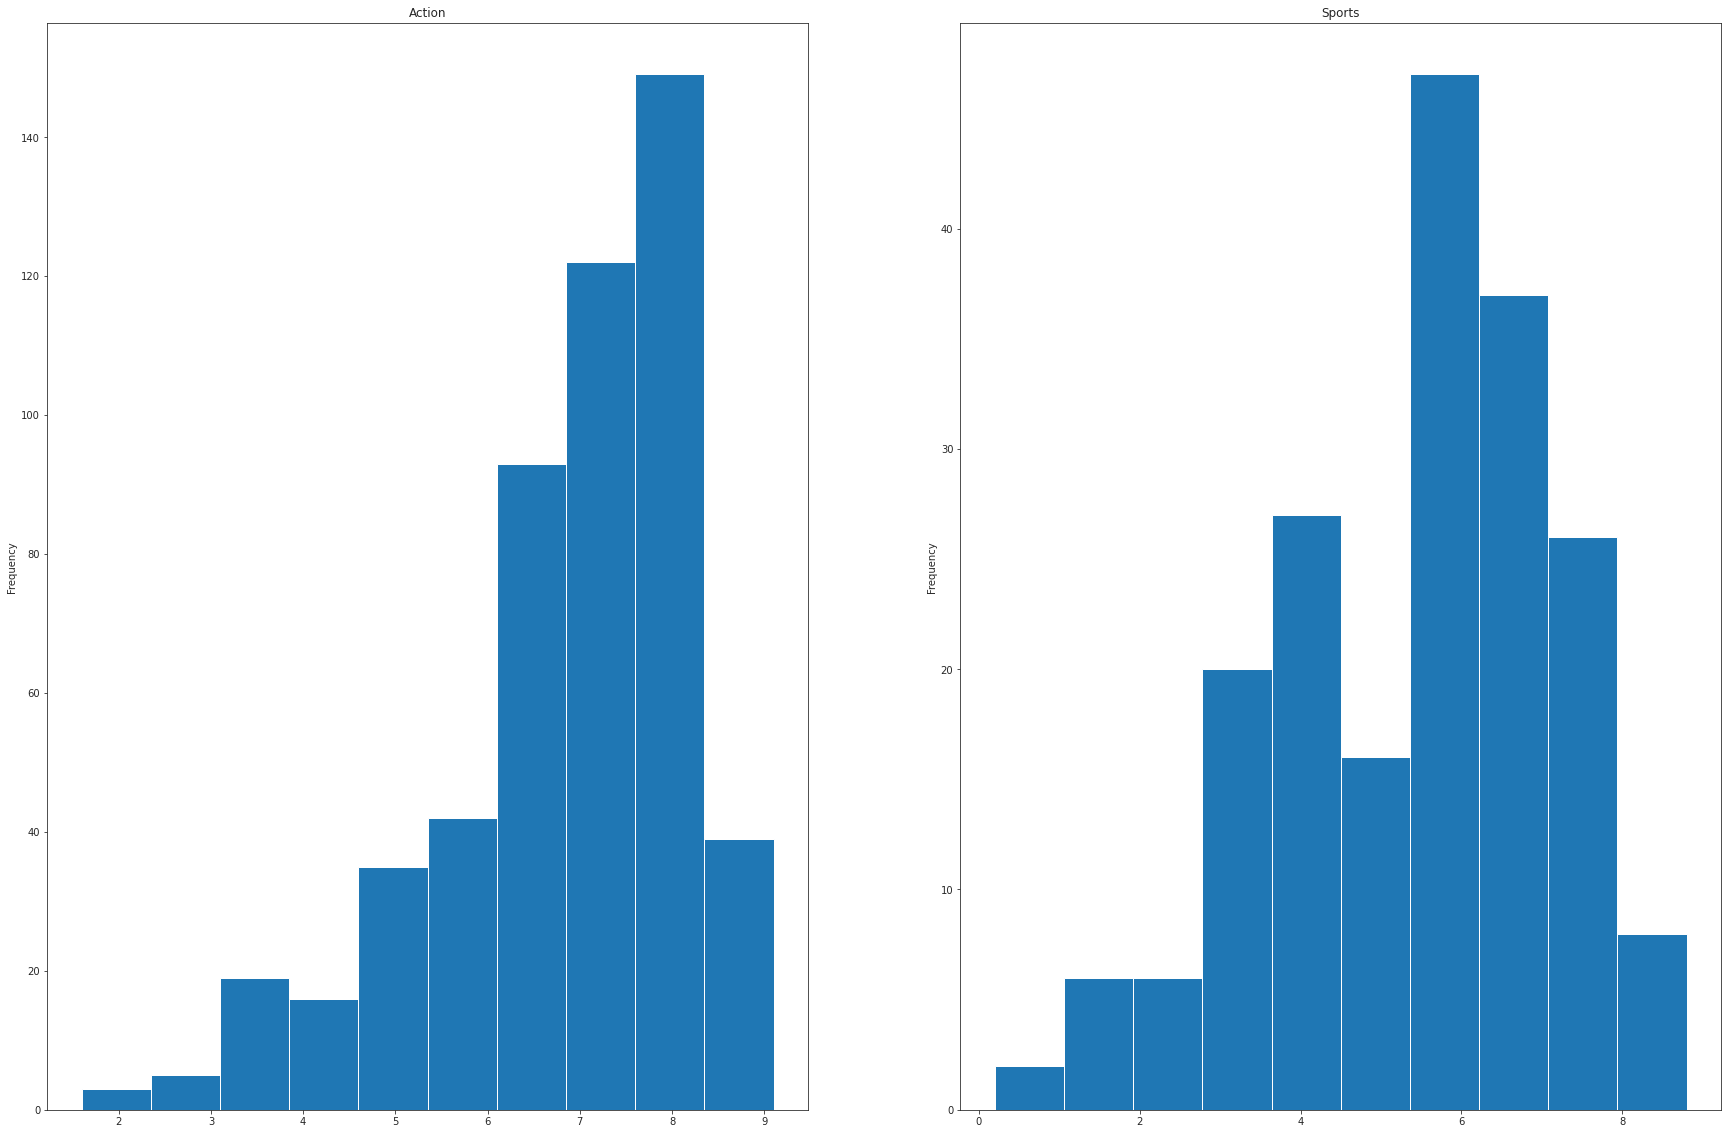

In [34]:
stat_test('genre', 'Action', 'Sports')  

Результат отвергает нулевую гипотезу, и значит рейтинги все же разные.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Обрати внимание, что наши действия также повторяются с точки зрения расчетов статистических тестов, это говорит о том, что мы можем также создать здесь функцию 😊
    
</div>

## Выводы

По проведенному анализу, видно что основными этапами работы с даннами игровой индустрии важны:
* оценка средней продолжительности **"жизни"** игровой платформы
* выбор актуального периода для анализа
* построение портрета игрока для каждого региона, в который должны войти:
    - распределение продаж по платформам
    - распределение продаж по жанрам

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
    
    
**[общий комментарий]** Ячейки **markdown** в том числе мы можем использовать как дополнительный способ стилизации нашего проекта. Оставил ниже ссылку, с примерами стилизации.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet     
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    

Возвращаю проект обратно, чтобы убедиться что все мои комментарии понятны.
    
Если вдруг у тебя возникнут какие-то вопросы, то я с радостью отвечу на них 😊
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Рад, что в целом все понятно и особенно здорово, что сразу вносишь правки в проект, так быстрее запомнится информация. Тогда предлагаю двигаться дальше.
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
    
</div>